# <font color=Green>Predict Remaining Useful Lifetime(RUL) of Aircraft Engine</font>

## <font color=Green>Usecase Details:</font>

<font color=Purple>__Remaining useful life (RUL)__ is the amount of time(in hours or cycle) a machine is likely to operate before it requires repair or replacement. Predicting the RUL has the following advantages:
 - Avoid unplanned downtime.
 - Optimize operating efficiency
 - Scheduled maintenance 

This interesting usecase is about identifying the Remaining Useful Lifetime (RUL) of Aircraft Engines. The task is to estimate remaining life of an unspecified system using historical data only, irrespective of the underlying physical process. 

<img src="https://thumbs.gfycat.com/QualifiedUnluckyDiscus-size_restricted.gif" width="750" align="center">

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine – i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

_Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, “Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation”, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008._

<font color=Blue>Dataset can be downloaded from:</font>
https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan
</font>


### Data Set Details

<font color=Purple>This dataset is created by simulating the engine degradation conditions of a jet engine. <br>
The details of the dataset:<br>

_Input:_
 - Sensor Data
 - 3 Operational settings
 - Unit number (Flight trajectory)
 - Flight duration (t)
      - Train set consists of complete flight duration till the point where degradation starts
      - Test set consists of some duration and our objective is to predict the time duration(cycles) after the given duration that the engine will continue to operate <br>

_Output:_
 - Remaining Useful Lifetime (If a engine will fail within "N" hours or not)
</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<font color=Purple>There are three files - Train, Test and RUL. The RUL text file contains the remaining useful lifetime of the test set. 

In [2]:
op_list = ["unit_no", "t", "op1", "op2", "op3"]
sensor_list = ["s{}".format(i) for i in range(1,22)]
train_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/train_FD001.txt'
train = pd.read_csv(train_url, sep='\s+', names=op_list+sensor_list)
test_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/test_FD001.txt'
test = pd.read_csv(test_url, sep='\s+', names=op_list+sensor_list)
RUL_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/RUL_FD001.txt'
RUL = pd.read_csv(RUL_url, names=['rul'])

<font color=Purple>A quick look at the training file reveals that there are 3 operational settings and 21 sensors.

In [3]:
train.head(5)

unit_no  t     op1     op2    op3  ...  s17   s18    s19    s20      s21
0        1  1 -0.0007 -0.0004  100.0  ...  392  2388  100.0  39.06  23.4190
1        1  2  0.0019 -0.0003  100.0  ...  392  2388  100.0  39.00  23.4236
2        1  3 -0.0043  0.0003  100.0  ...  390  2388  100.0  38.95  23.3442
3        1  4  0.0007  0.0000  100.0  ...  392  2388  100.0  38.88  23.3739
4        1  5 -0.0019 -0.0002  100.0  ...  393  2388  100.0  38.90  23.4044

[5 rows x 26 columns]

In [4]:
test.head(5)

unit_no  t     op1     op2    op3  ...  s17   s18    s19    s20      s21
0        1  1  0.0023  0.0003  100.0  ...  392  2388  100.0  38.86  23.3735
1        1  2 -0.0027 -0.0003  100.0  ...  393  2388  100.0  39.02  23.3916
2        1  3  0.0003  0.0001  100.0  ...  393  2388  100.0  39.08  23.4166
3        1  4  0.0042  0.0000  100.0  ...  391  2388  100.0  39.00  23.3737
4        1  5  0.0014  0.0000  100.0  ...  390  2388  100.0  38.99  23.4130

[5 rows x 26 columns]

In [5]:
RUL.head(5)

rul
0  112
1   98
2   69
3   82
4   91

<font color=Purple>Create a new column "ttf" (Time to failure) denoting the time left before the engine stops completely. Add a column "unit_no" to RUL to match the "unit_no" column from the Train and Test file.

In [6]:
train['ttf']=train.groupby(by='unit_no')['t'].transform(lambda x:(x[::-1]-1))

train_filter=train.filter(regex='s\\d', axis=1)
train_sample=train[train['unit_no']==1]
RUL['unit_no']=RUL.index+1
RUL.head(5)

rul  unit_no
0  112        1
1   98        2
2   69        3
3   82        4
4   91        5

<font color=Purple>There are some sensors which are having less unique values. These may be a part of the operational settings. Better to drop these sensor values.

In [7]:
train_filter.nunique()

s1        1
s2      310
s3     3012
s4     4051
s5        1
s6        2
s7      513
s8       53
s9     6403
s10       1
s11     159
s12     427
s13      56
s14    6078
s15    1918
s16       1
s17      13
s18       1
s19       1
s20     120
s21    4745
dtype: int64

In [8]:
train_filter=train_filter.drop(['s1','s5','s6','s10','s16','s18','s19'], axis=1)
train_filter.head(5)

s2       s3       s4      s7  ...     s15  s17    s20      s21
0  641.82  1589.70  1400.60  554.36  ...  8.4195  392  39.06  23.4190
1  642.15  1591.82  1403.14  553.75  ...  8.4318  392  39.00  23.4236
2  642.35  1587.99  1404.20  554.26  ...  8.4178  390  38.95  23.3442
3  642.35  1582.79  1401.87  554.45  ...  8.3682  392  38.88  23.3739
4  642.37  1582.85  1406.22  554.00  ...  8.4294  393  38.90  23.4044

[5 rows x 14 columns]

### Data Quality Assessment

<font color=Purple>Since the data was generated from a simulation software (C-MAPSS), all the required values are available. The data is clean without any Null values.

In [9]:
train.isnull().sum()

unit_no    0
t          0
op1        0
op2        0
op3        0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
s7         0
s8         0
s9         0
s10        0
s11        0
s12        0
s13        0
s14        0
s15        0
s16        0
s17        0
s18        0
s19        0
s20        0
s21        0
ttf        0
dtype: int64

### Data Visualization (e.g. value distribution of columns)

<font color=Purple>Boxplot of the time taken for each flight. There are some outliers. Let's observe the mean value and the range of the time(cycles) for stable jet engine. The engine starts to degrade after some point. <br>
A typical flight duration ranges from around 170 - 230.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


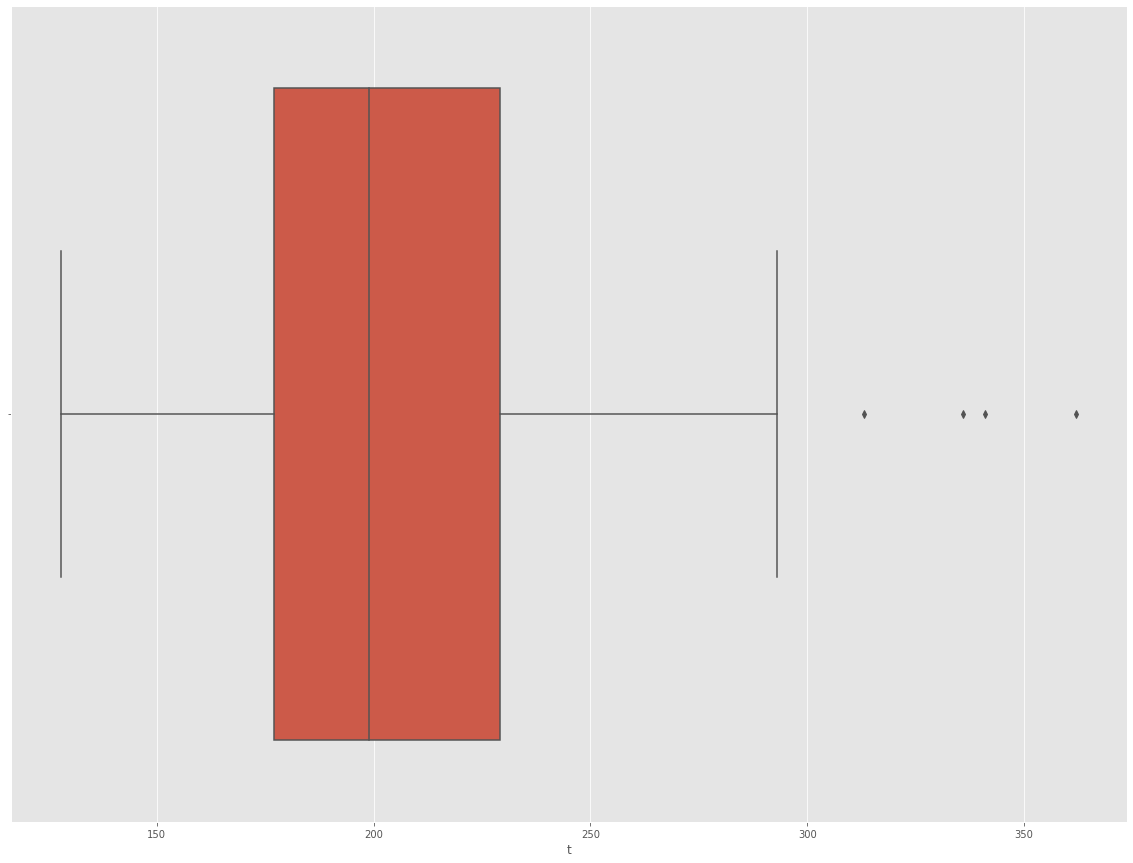

In [10]:
plt.figure(figsize=(20,15))
sns.boxplot(x=train.groupby(by='unit_no')['t'].max(), orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


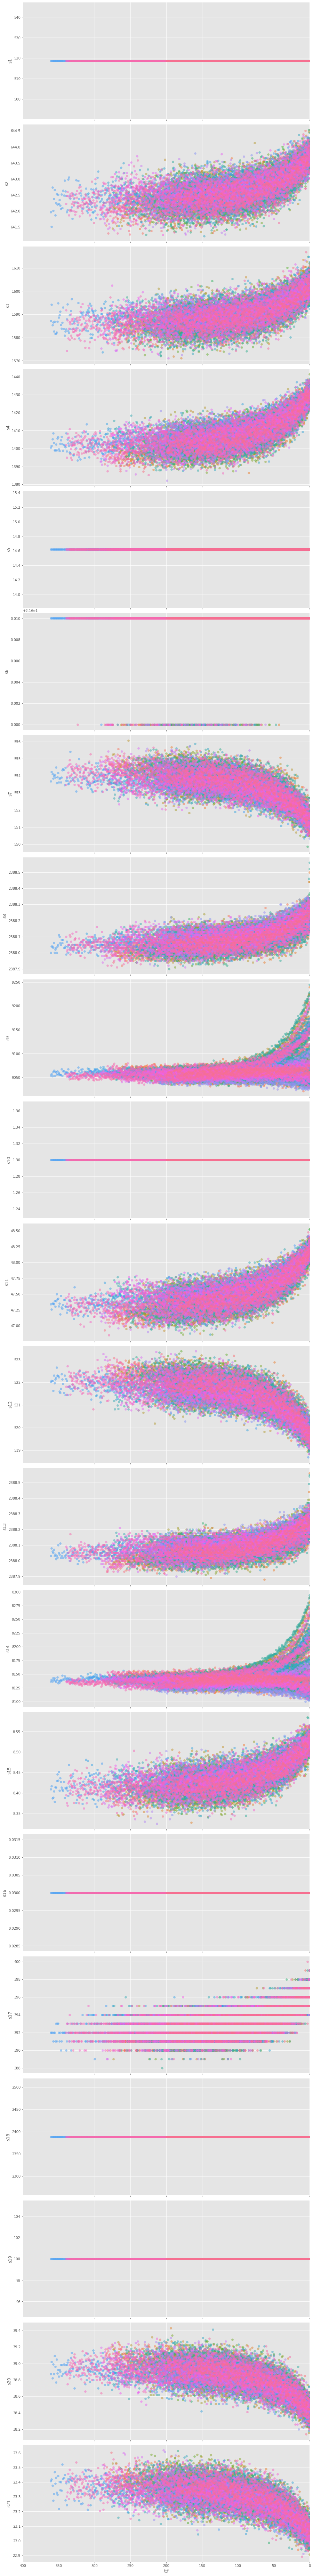

In [11]:
explore = sns.PairGrid(data = train,
                       x_vars="ttf",
                       y_vars=sensor_list,#list(train_filter.keys()),
                       hue = 'unit_no',
                       size=5,
                       aspect=2.5)
explore = explore.map(plt.scatter, alpha=0.5)
explore = explore.set(xlim=(400,0))

### _Let's look at the __operating settings___
<img src="https://www.androidcentral.com/sites/androidcentral.com/files/styles/large/public/article_images/2015/06/beep-volume.gif" width="450" align="center">


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


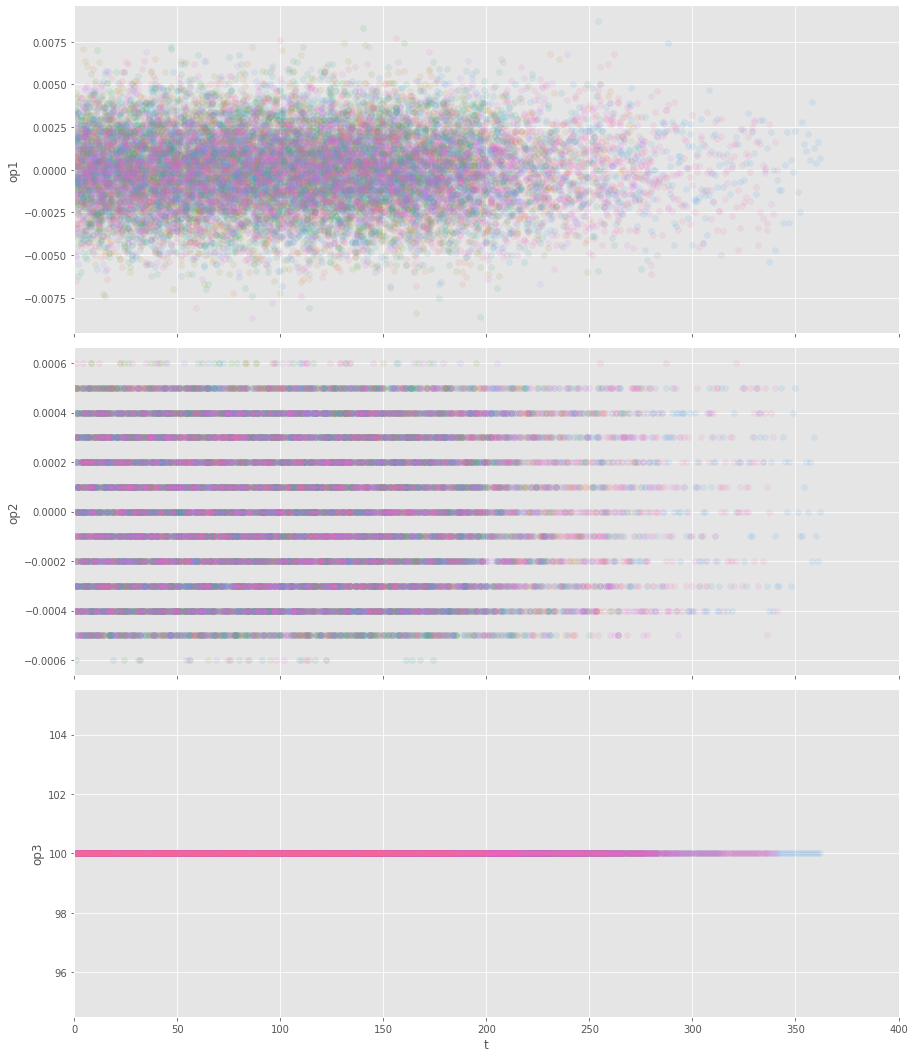

In [12]:
explore = sns.PairGrid(data = train, x_vars="t", y_vars=["op1", "op2", "op3"], hue = 'unit_no',size=5, aspect = 2.5)
explore = explore.map(plt.scatter, alpha=0.11)
explore = explore.set(xlim=(0, 400))

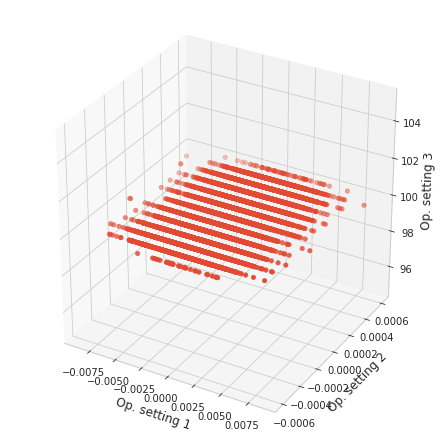

In [13]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = train['op1']
y = train['op2']
z = train['op3']


ax.scatter(x, y, z, marker='o')
ax.set_xlabel('Op. setting 1')
ax.set_ylabel('Op. setting 2')
ax.set_zlabel('Op. setting 3')

plt.show()

### Data Exploration (e.g. correlation between columns)

<font color=Purple>Many sensors appear to be correlated with each other. 

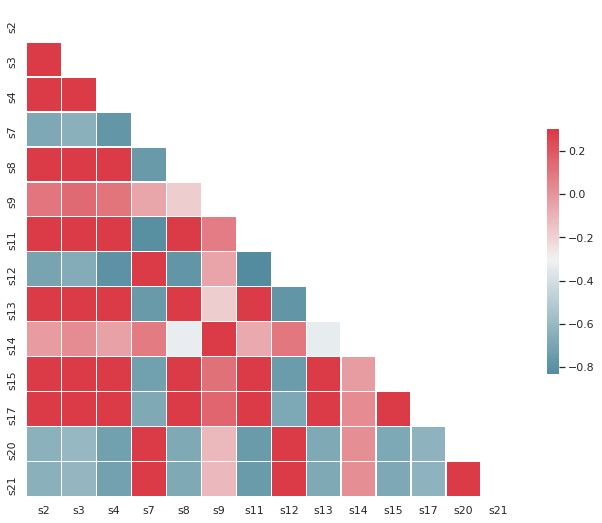

In [14]:
sns.set(style="white")

# Compute the correlation matrix
corr = train_filter.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=-0.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Traditional ML Model
### RF Classification

<font color=Purple>We are going to classify if the Remaining Useful Lifetime(RUL) is less than 50 cycles (time left). Hence we need to get another column which has 1 if the cycles are less than 50 and 0 otherwise. This becomes a binary classification problem using <font color=Green>__Random Forest classifier__.</font> </font>

In [15]:
cycles = 50
train['label'] = np.where(train['ttf'] <= cycles, 1, 0 )
features_col_name=['op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
X_train = train[features_col_name].drop(['s1','s5','s6','s10','s16','s18','s19'], axis=1)
y_train = train['label']

<font color=Purple>Steps:<br>
 - Initialize RF classifier with random state
 - Set up 5-fold cross validation (K-fold)
 - Set up a pipeline with <font color=Green>__feature engineering__</font> (Scaling)
 - Use Gridsearch and find the best model parameters
 - Show the best fit estimators
    </font>

In [16]:
import numpy as np
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
rf = ensemble.RandomForestClassifier(random_state = 42)
# set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)
# pipeline standardization and model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.MinMaxScaler())
                           , ('model', rf) ])
# tune the model
my_min_samples_leaf = [2, 25, 50]
my_max_depth = [8, 9, 10, 12, 50]
# run the model using gridsearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, model__max_depth = my_max_depth)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1
                           )
optimized_rf.fit(X_train, y_train)
# show the best model estimators
y_pred_proba = optimized_rf.predict_proba(X_train)[:, 1]
y_pred = optimized_rf.predict(X_train)
print(optimized_rf.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.5min finished


Pipeline(memory=None,
         steps=[('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=50, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=25,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)


<font color=Purple>Check the <font color=Green>__Train__</font> set accuracy</font>

In [17]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report
print("Random Forest Accuracy: "+"{:.1%}".format(accuracy_score(y_train, y_pred)))
print("Random Forest Precision: "+"{:.1%}".format(precision_score(y_train, y_pred)))
print("Random Forest Recall: "+"{:.1%}".format(recall_score(y_train, y_pred)))

Confusion Matrix:
[[15156   375]
 [  814  4286]]
Random Forest Accuracy: 94.2%
Random Forest Precision: 92.0%
Random Forest Recall: 84.0%


<font color=Purple>Check the <font color=Green>__Test__</font> set accuracy</font>

In [18]:
test_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/test_FD001.txt'
test = pd.read_csv(test_url, sep='\s+', names=op_list+sensor_list)
test['ttf']=test.groupby(by='unit_no')['t'].transform(lambda x:(x[::-1]-1))
test=test.merge(RUL,on=['unit_no'],how='left')
test['ttf'] = test['rul']+test['ttf']
test['label'] = np.where(test['ttf'] <= cycles, 1, 0 )
y_test = test['label']

# test = test.filter(regex='s\\d', axis=1)

test = test[features_col_name].drop(['s1','s5','s6','s10','s16','s18','s19'], axis=1)

y_pred_proba = optimized_rf.predict_proba(test)[:, 1]
y_pred = optimized_rf.predict(test)
# print(optimized_rf.best_estimator_)

In [19]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
rf_acc = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1score = f1_score(y_test, y_pred)
print("Random Forest f1score: "+"{:.1%}".format(rf_f1score));
print("Random Forest Accuracy: "+"{:.1%}".format(rf_acc));
print("Random Forest Precision: "+"{:.1%}".format(rf_precision));
print("Random Forest Recall: "+"{:.1%}".format(rf_recall));
print("Classification Report:")
print(classification_report(y_test, y_pred))
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

Confusion Matrix:
[[12105   105]
 [  352   534]]
Random Forest f1score: 70.0%
Random Forest Accuracy: 96.5%
Random Forest Precision: 83.6%
Random Forest Recall: 60.3%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12210
           1       0.84      0.60      0.70       886

    accuracy                           0.97     13096
   macro avg       0.90      0.80      0.84     13096
weighted avg       0.96      0.97      0.96     13096



## Deep Learning based Model
### LSTM

<font color=Purple>We are going to classify if the Remaining Useful Lifetime(RUL) is less than 50 cycles (time left). Hence we need to get another column which has 1 if the cycles are less than 50 and 0 otherwise. This becomes a binary classification problem using <font color=Green>__LSTM(Long Short Term Memory)__.</font> </font>

In [20]:
op_list = ["unit_no", "t", "op1", "op2", "op3"]
sensor_list = ["s{}".format(i) for i in range(1,22)]
train_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/train_FD001.txt'
train = pd.read_csv(train_url, sep='\s+', names=op_list+sensor_list)
test_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/test_FD001.txt'
test = pd.read_csv(test_url, sep='\s+', names=op_list+sensor_list)
RUL_url='https://raw.githubusercontent.com/gomathyshankar/PrognosticsData/master/Data/CMAPSSData/RUL_FD001.txt'
RUL = pd.read_csv(RUL_url, names=['rul'])
RUL['unit_no']=RUL.index+1

In [21]:
cycles = 50
train['ttf']=train.groupby(by='unit_no')['t'].transform(lambda x:(x[::-1]-1))
train['label'] = np.where(train['ttf'] <= cycles, 1, 0 )

test['ttf']=test.groupby(by='unit_no')['t'].transform(lambda x:(x[::-1]-1))
test=test.merge(RUL,on=['unit_no'],how='left')
test['ttf'] = test['rul']+test['ttf']

test['label'] = np.where(test['ttf'] <= cycles, 1, 0 )

In [22]:
test.head(5)

unit_no  t     op1     op2    op3  ...    s20      s21  ttf  rul  label
0        1  1  0.0023  0.0003  100.0  ...  38.86  23.3735  142  112      0
1        1  2 -0.0027 -0.0003  100.0  ...  39.02  23.3916  141  112      0
2        1  3  0.0003  0.0001  100.0  ...  39.08  23.4166  140  112      0
3        1  4  0.0042  0.0000  100.0  ...  39.00  23.3737  139  112      0
4        1  5  0.0014  0.0000  100.0  ...  38.99  23.4130  138  112      0

[5 rows x 29 columns]

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
features_col_name=['op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']# train_filter=train.filter(regex='s\\d', axis=1)
train[features_col_name]=sc.fit_transform(train[features_col_name])
test[features_col_name]=sc.fit_transform(test[features_col_name])

train = train.drop(['s1','s5','s6','s10','s16','s18','s19'], axis=1)
test = test.drop(['s1','s5','s6','s10','s16','s18','s19'], axis=1)

In [24]:
test.head(5)

unit_no  t      op1       op2  op3  ...       s20       s21  ttf  rul  label
0        1  1  0.65625  0.692308  0.0  ...  0.500000  0.620099  142  112      0
1        1  2  0.34375  0.230769  0.0  ...  0.645455  0.645718  141  112      0
2        1  3  0.53125  0.538462  0.0  ...  0.700000  0.681104  140  112      0
3        1  4  0.77500  0.461538  0.0  ...  0.627273  0.620382  139  112      0
4        1  5  0.60000  0.461538  0.0  ...  0.618182  0.676008  138  112      0

[5 rows x 22 columns]

In [25]:
def gen_sequence(id_df, seq_length, seq_cols):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)

# function to generate labels
def gen_label(id_df, seq_length, seq_cols,label):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        y_label.append(id_df[label][stop])
    return np.array(y_label)

<font color=Purple>Define the window size and the columns to be added to the LSTM Sequence</font>

In [26]:
seq_length=50
seq_cols=train.keys()

In [27]:
# generate X_train
X_train=np.concatenate(list(list(gen_sequence(train[train['unit_no']==id], seq_length, seq_cols)) for id in train['unit_no'].unique()))
print(X_train.shape)
# generate y_train
y_train=np.concatenate(list(list(gen_label(train[train['unit_no']==id], 50, seq_cols,'label')) for id in train['unit_no'].unique()))
print(y_train.shape)

(20531, 50, 21)
(20531,)


In [28]:
# generate X_test
X_test=np.concatenate(list(list(gen_sequence(test[test['unit_no']==id], seq_length, seq_cols)) for id in test['unit_no'].unique()))
print(X_test.shape)
# generate y_test
y_test=np.concatenate(list(list(gen_label(test[test['unit_no']==id], 50, seq_cols,'label')) for id in test['unit_no'].unique()))
print(y_test.shape)

(12996, 50, 21)
(12996,)


In [29]:
!pip install tensorflow
!pip install keras

In [30]:
import tensorflow
tensorflow.__version__
import keras
print(keras.__version__)

2.4.3


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

nb_features =X_train.shape[2]
timestamp=seq_length

model = Sequential()

model.add(LSTM(
         input_shape=(timestamp, nb_features),
         units=50,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            14400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 34,651
Trainable params: 34,651
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit the network
model.fit(X_train, y_train, epochs=5, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Epoch 1/5
98/98 [==============================] - 17s 137ms/step - loss: 0.2593 - accuracy: 0.8944 - val_loss: 0.1417 - val_accuracy: 0.9484
Epoch 2/5
98/98 [==============================] - 12s 125ms/step - loss: 0.0422 - accuracy: 0.9839 - val_loss: 0.1411 - val_accuracy: 0.9581
Epoch 3/5
98/98 [==============================] - 12s 126ms/step - loss: 0.0284 - accuracy: 0.9885 - val_loss: 0.0142 - val_accuracy: 0.9951
Epoch 4/5
98/98 [==============================] - 12s 126ms/step - loss: 0.0238 - accuracy: 0.9909 - val_loss: 0.0129 - val_accuracy: 0.9971
Epoch 5/5
98/98 [==============================] - 12s 125ms/step - loss: 0.0221 - accuracy: 0.9908 - val_loss: 0.0185 - val_accuracy: 0.9912


In [33]:
# training metrics
scores = model.evaluate(X_train, y_train, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

103/103 [==============================] - 5s 45ms/step - loss: 0.0254 - accuracy: 0.9885
Accurracy: 0.9885051846504211


In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype("int32")
print('Accuracy of model on test data: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
lstm_acc = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred)
lstm_recall = recall_score(y_test, y_pred)
lstm_f1score = f1_score(y_test, y_pred)
print("f1score: "+"{:.1%}".format(lstm_f1score));
print("Accuracy: "+"{:.1%}".format(lstm_acc));
print("Precision: "+"{:.1%}".format(lstm_precision));
print("Recall: "+"{:.1%}".format(lstm_recall));

Accuracy of model on test data:  0.9953062480763312
Confusion Matrix: 
 [[12110     0]
 [   61   825]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     12110
         1.0       1.00      0.93      0.96       886

    accuracy                           1.00     12996
   macro avg       1.00      0.97      0.98     12996
weighted avg       1.00      1.00      1.00     12996

f1score: 96.4%
Accuracy: 99.5%
Precision: 100.0%
Recall: 93.1%


<img src="https://media1.giphy.com/media/7SOcYFAgjD3yk4CCaO/giphy-downsized-medium.gif" width="750" align="center">